In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

Using TensorFlow backend.


In [2]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

# Michael change
#from tensorflow import keras
import keras

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

# This code was tested with TensorFlow v1.4
print("You have TensorFlow version", tf.__version__)

Using TensorFlow backend.


You have TensorFlow version 1.3.0


# Here We Will Work with DB

In [55]:
data4 = pd.read_csv('DB/Small_stackoverflow.csv')

In [3]:
data1 = pd.read_csv("DB/stack-overflow-data.csv")
data2 = pd.read_csv("DB/Freelance_stackexange.csv")
data3 = pd.read_csv("DB/StartUp_stackexange.csv")

In [4]:
print(data1.shape)
print(data2.shape)
print(data3.shape)

print(data1[:10])

(40000, 2)
(1494, 4)
(3014, 4)
                                                post           tags
0  what is causing this behavior  in our c# datet...             c#
1  have dynamic html load as if it was in an ifra...        asp.net
2  how to convert a float value in to min:sec  i ...    objective-c
3  .net framework 4 redistributable  just wonderi...           .net
4  trying to calculate and print the mean and its...         python
5  how to give alias name for my website  i have ...        asp.net
6  window.open() returns null in angularjs  it wo...      angularjs
7  identifying server timeout quickly in iphone  ...         iphone
8  unknown method key  error in rails 2.3.8 unit ...  ruby-on-rails
9  from the include  how to show and hide the con...      angularjs


In [57]:
data4

,Id,Body,Tags
0,218760,<p>Although elements like <code>&lt;div&gt;</c...,<html><css><layout><css-float>
1,312900,<p>I'm writing a little web-based utility for ...,<jquery><user-interface><usability>
2,421547,<p>Imagine that I will make an async call in ....,<c#><.net><asynchronous><garbage-collection>
3,674416,<p>i have a process that makes calls to a webs...,<c#><asp.net><events><webforms>
4,1025018,"<p>I'm implementing a ""Google Suggest"" like au...",<python><ajax><autocomplete><trie>
5,1061294,<p>I have backed myself into a a bit of a corn...,<c#><generics><constructor>
6,1125922,<p>Is there an AJAX control for converting HTM...,<html><ajax><pdf>
7,1269165,<p>I am looking to remover the circle bullet l...,<html><css><twitter>
8,1277887,<p>I'm trying to write an AJAX enabled WebCont...,<javascript><asp.net><ajax>
9,1294501,<p>How to prevent downloading images and video...,<html><image><video><blocking>


In [28]:
import re

def body_cleaner(body):
    """body is a string"""
    body = re.sub(r'<[^>]*>', '', body)
    #body = re.sub(r'\^', '', body)
    return body

In [58]:
tags = set()
data = pd.DataFrame(columns=['Body', 'Tag'])

# data set one
for body, tag_row in zip(data1.post, data1.tags):
    tags.add(tag_row)
    data = data.append({'Body' : body_cleaner(body), 'Tag' : tag_row}, ignore_index=True)
    
# data set two
for body, tag_row in zip(data2.Body, data2.Tags):
    for tag in (tag_row[1:-1]).split('><'): 
        tags.add(tag)
        data = data.append({'Body' : body_cleaner(body), 'Tag' : tag}, ignore_index=True)
        
# data set three
for body, tag_row in zip(data3.Body, data3.Tags):
    for tag in (tag_row[1:-1]).split('><'): 
        tags.add(tag)
        data = data.append({'Body' : body_cleaner(body), 'Tag' : tag}, ignore_index=True)
        
# data set four
for body, tag_row in zip(data4.Body, data4.Tags):
    for tag in (tag_row[1:-1]).split('><'): 
        tags.add(tag)
        data = data.append({'Body' : body_cleaner(body), 'Tag' : tag}, ignore_index=True)

tags = list(tags)   
print(len(tags))
print(list(tags)[:10])

TypeError: object of type 'NoneType' has no len()

In [30]:
data.to_csv('DB/FullDB_v2_with_rep_body.csv', sep='<', line_terminator='>')

In [33]:
data = pd.read_csv('DB/FullDB_v2_with_rep_body.csv', sep='<', lineterminator='>')

In [34]:
print(data.shape)
print(data.columns)
print(data.Body[0])
print(data.Tag.value_counts())

(50761, 3)
Index(['Unnamed: 0', 'Body', 'Tag'], dtype='object')
what is causing this behavior  in our c# datetime type  [test] public void sadness() {    var datetime = datetime.utcnow;    assert.that(datetime  is.equalto(datetime.parse(datetime.tostring()))); }    failed :    expected: 2011-10-31 06:12:44.000  but was:  2011-10-31 06:12:44.350    i wish to know what is happening behind the scenes in tostring() etc to cause this behavior.    edit after seeing jon s answer :   [test] public void newsadness() {     var datetime = datetime.utcnow;     assert.that(datetime  is.equalto(datetime.parse(datetime.tostring( o )))); }    result :   expected: 2011-10-31 12:03:04.161 but was:  2011-10-31 06:33:04.161    same result with capital and small  o  . i m reading up the docs  but still unclear.
html                       2000
jquery                     2000
c                          2000
ios                        2000
javascript                 2000
asp.net                    2000
sql   

# NN learn

In [36]:
len([data.Tag == 'usa'])

1

In [117]:
# DELL ALL USA!!!
#### NONNONONONO! 
# data = data.drop(data[data.Tag == 'usa'].index)

In [37]:
# Split data into train and test
train_size = int(len(data) * .8)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(data) - train_size))

Train size: 40608
Test size: 10153


In [38]:
train_posts = data['Body'][:train_size]
train_tags = data['Tag'][:train_size]

test_posts = data['Body'][train_size:]
test_tags = data['Tag'][train_size:]

In [39]:
max_words = 3000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [40]:
tokenize.fit_on_texts(train_posts) # only fit on train
x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

In [41]:
# Use sklearn utility to convert label strings to numbered index
encoder = LabelEncoder()
encoder.fit(tags)

LabelEncoder()

In [42]:
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

In [43]:
# Converts the labels to a one-hot representation
num_classes = int(max(np.max(y_test), np.max(y_train)) + 1)

print(num_classes)

print(y_train)

y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

381
[ 44  18 229 ..., 359  69 248]


In [44]:
# Inspect the dimenstions of our training and test data (this is helpful to debug)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (40608, 3000)
x_test shape: (10153, 3000)
y_train shape: (40608, 381)
y_test shape: (10153, 381)


In [50]:
# This model trains very quickly and 2 epochs are already more than enough
# Training for more epochs will likely lead to overfitting on this dataset
# You can try tweaking these hyperparamaters when using this model with your own data
batch_size = 32
epochs = 2

In [51]:
# Build the model
model = Sequential()
model.add(Dense(1024, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# # michael addition
model.add(Dense(512))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [52]:
# model.fit trains the model
# The validation_split param tells Keras what % of our training data should be used in the validation set
# You can see the validation loss decreasing slowly when you run this
# Because val_loss is no longer decreasing we stop training to prevent overfitting
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 36547 samples, validate on 4061 samples
Epoch 1/2
36547/36547 [==============================] - 132s - loss: 0.8533 - acc: 0.7419 - val_loss: 2.5747 - val_acc: 0.6833
Epoch 2/2
36547/36547 [==============================] - 137s - loss: 0.4488 - acc: 0.8533 - val_loss: 2.7528 - val_acc: 0.6880


In [53]:
# Evaluate the accuracy of our trained model
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

10144/10153 [============================>.] - ETA: 0sTest score: 14.7661437458
Test accuracy: 0.0


In [54]:
# Here's how to generate a prediction on individual examples
text_labels = encoder.classes_ 

for i in range(10):
    prediction = model.predict(np.array([x_test[i]]))
    predicted_label = text_labels[np.argmax(prediction)]
    print(test_posts.iloc[i][:50], "...")
    print('Actual label:' + test_tags.iloc[i])
    print("Predicted label: " + predicted_label + "\n")  

How to collect final payments from users who run a ...
Actual label:remote
Predicted label: .net

I want to work online. I've tried freelancer.com,  ...
Actual label:freelance-websites
Predicted label: c#

I estimated X hours. As I showed them the progress ...
Actual label:estimation
Predicted label: c#

I estimated X hours. As I showed them the progress ...
Actual label:scope-creep
Predicted label: c#

I estimated X hours. As I showed them the progress ...
Actual label:scope-of-work
Predicted label: c#

At the time of answering an email, I quoted a comp ...
Actual label:pay-rate
Predicted label: .net

Andrew in his reply showed us what should Retainer ...
Actual label:retainer
Predicted label: sql

I run a website as a hobby. I have to pay for host ...
Actual label:registration
Predicted label: html

I run a website as a hobby. I have to pay for host ...
Actual label:webmasters
Predicted label: html

I run a website as a hobby. I have to pay for host ...
Actual label:germany
Predicted

In [138]:
y_softmax = model.predict(x_test)

y_test_1d = []
y_pred_1d = []

for i in range(len(y_test)):
    probs = y_test[i]
    index_arr = np.nonzero(probs)
    one_hot_index = index_arr[0].item(0)
    y_test_1d.append(one_hot_index)

for i in range(0, len(y_softmax)):
    probs = y_softmax[i]
    predicted_index = np.argmax(probs)
    y_pred_1d.append(predicted_index)

In [139]:
# This utility function is from the sklearn docs: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

/home/michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


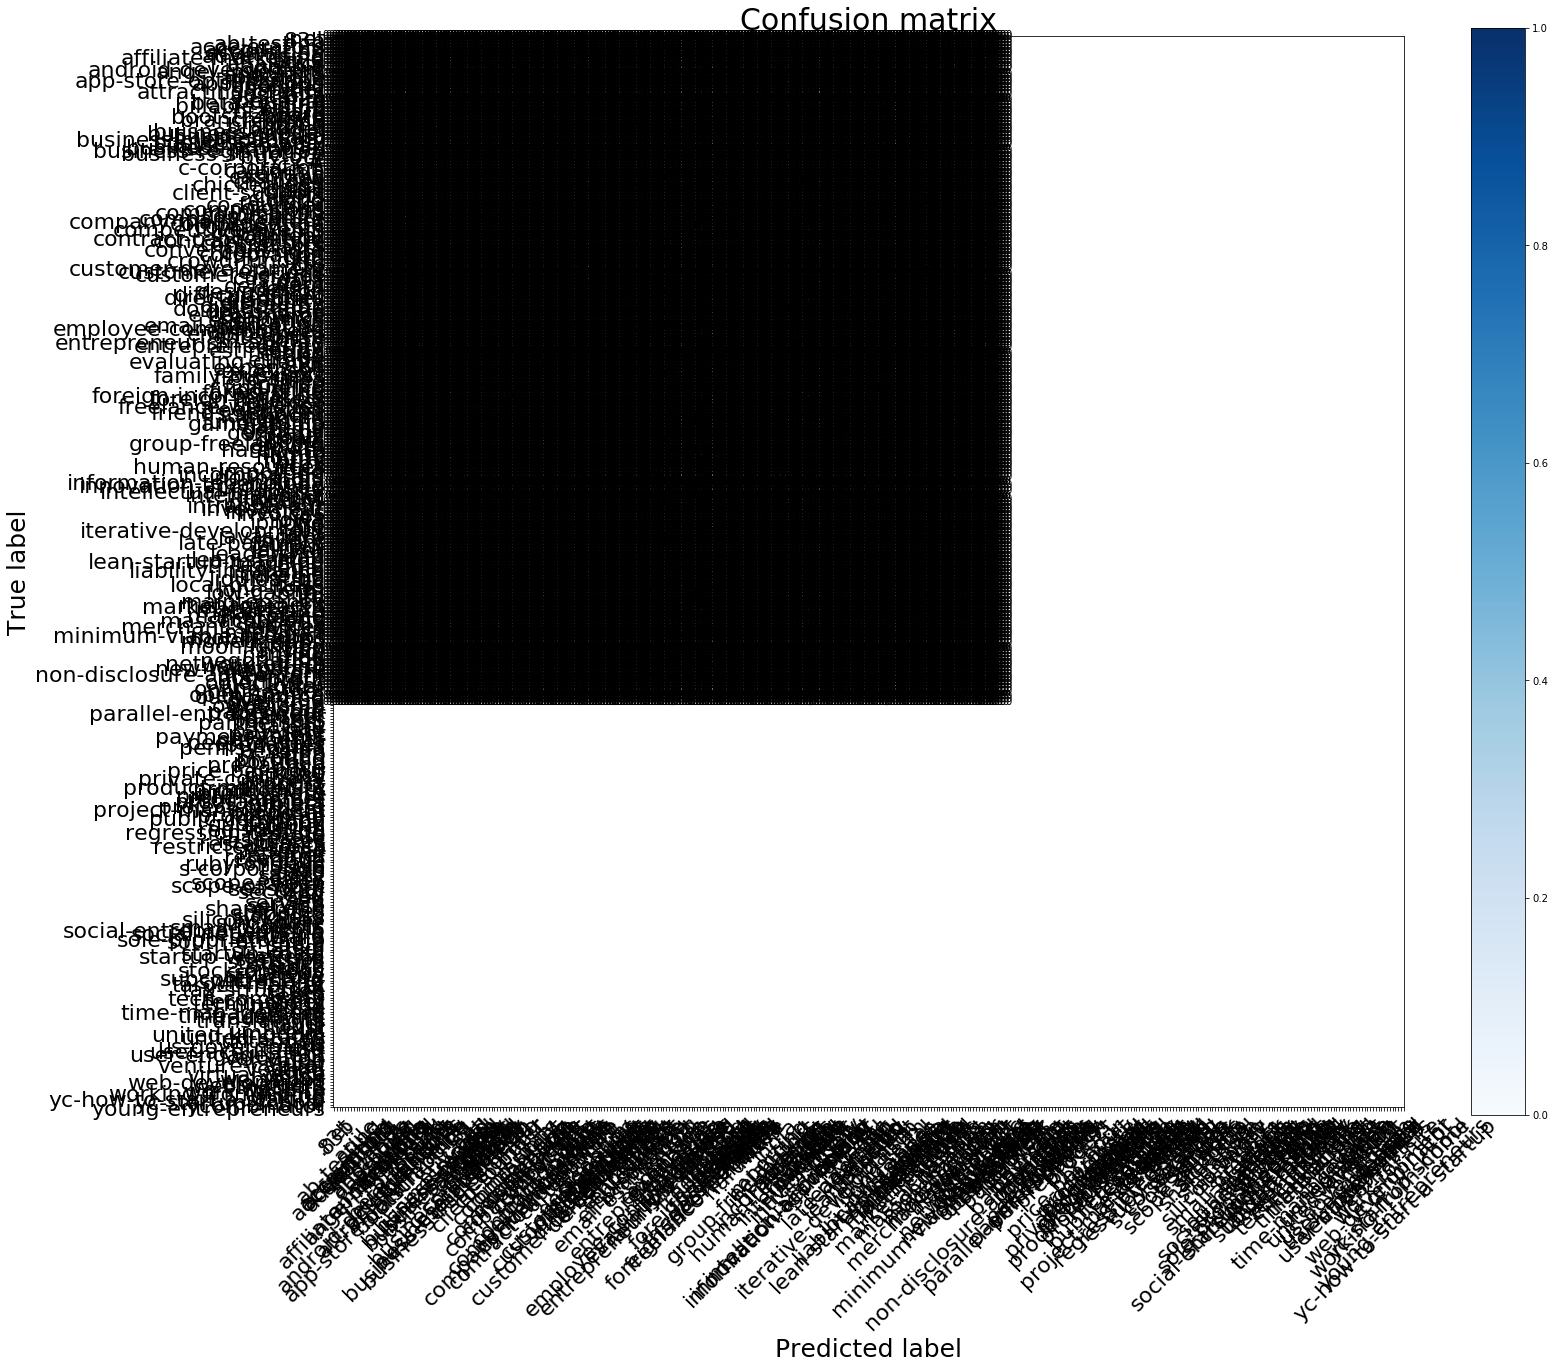

In [140]:
cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()